# **Lab-4**

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread("sun_flower.jpg")
image = cv.resize(image, None, fx=0.5, fy=0.5)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

**Harris Corner Detection**

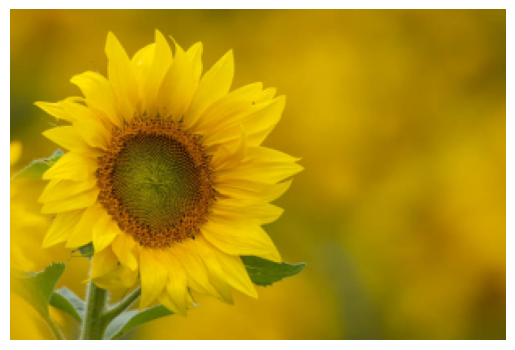

In [3]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Perform corner detection using Shi-Tomasi algorithm
corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Convert corner coordinates to integers
corners = np.intp(corners)

# Draw the detected corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image, (x, y), 5, (0, 255, 0), -1)

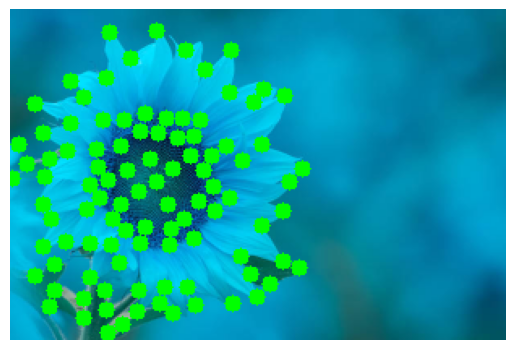

In [5]:
# Display the image with detected corners
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Scale-Invariant Feature Transform**

In [6]:
image = cv.imread("sun_flower.jpg")
image = cv.resize(image, None, fx=0.5, fy=0.5)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [7]:
sift = cv.SIFT_create()

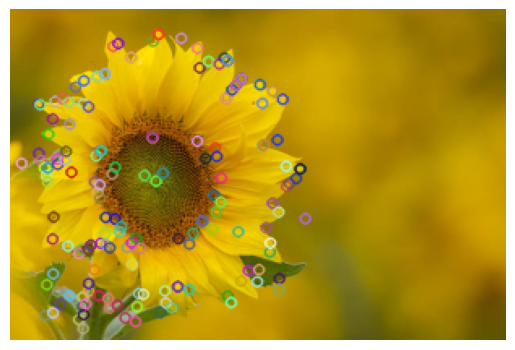

In [8]:
# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
image_key = cv.drawKeypoints(image, keypoints, None)
plt.imshow(cv.cvtColor(image_key, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Detection of Blobs**

In [9]:
image = cv.imread("sun_flower.jpg")
image = cv.resize(image, None, fx=0.5, fy=0.5)
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [10]:
params = cv.SimpleBlobDetector_Params()

In [11]:
# Change threshold
params.minThreshold = 10
params.maxThreshold = 200

In [12]:
# Filter by Area
params.filterByArea = True
params.minArea = 100

In [13]:
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

In [14]:
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

In [15]:
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

In [16]:
detector = cv.SimpleBlobDetector_create(params)

In [17]:
keypoints = detector.detect(grey)

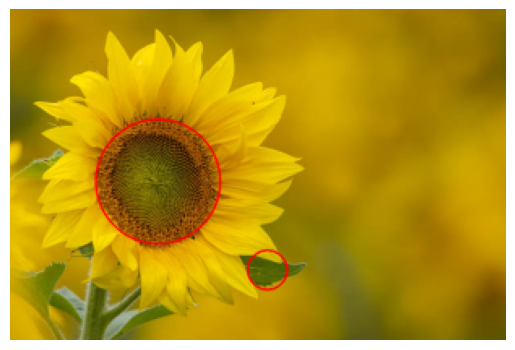

In [18]:
blobs_img = cv.drawKeypoints(image,
                             keypoints, None, (0, 0, 255),
                             cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv.cvtColor(blobs_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Histogram of Oriented Gradients**

In [19]:
# Set HOG params
win_size = (64, 128)
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
nbins = 9

In [20]:
hog = cv.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
hog_features = hog.compute(grey)

In [21]:
# Reshape features into 1D array
hog_features = hog_features.ravel()

In [22]:
print(f"Shape of HOG features: {hog_features.shape}")

Shape of HOG features: (1171800,)


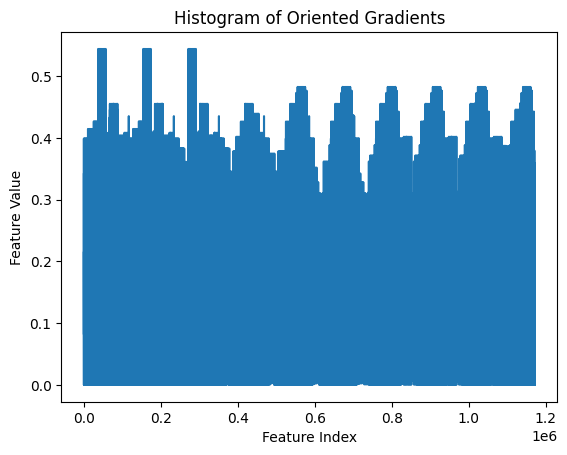

In [23]:
plt.plot(hog_features)
plt.title("Histogram of Oriented Gradients")
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()

**Feature Matching**

In [24]:
img1 = cv.imread("sun_flower.jpg")
img1 = cv.resize(image, None, fx=1, fy=1)
img2 = cv.imread("sun_flower.jpg")
img2 = cv.resize(image, None, fx=1, fy=1)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [25]:
orb = cv.ORB_create()

In [26]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [27]:
# Initilize Brute-Force matcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

In [28]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

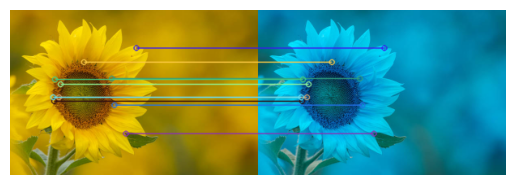

In [29]:
match_res = cv.drawMatches(img1, kp1, img2, kp2,
                           matches[:10], None,
                           flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv.cvtColor(match_res, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()